In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='Sex'>

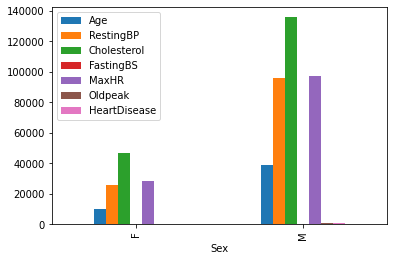

In [6]:
data.groupby('Sex').sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Sex'>

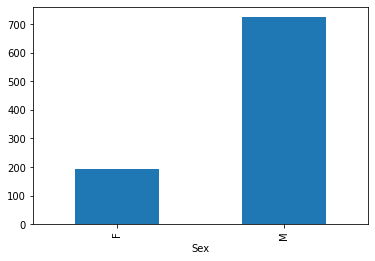

In [7]:
data.groupby('Sex').size().plot(kind = 'bar')

In [8]:
data[['Cholesterol', 'Age', 'HeartDisease', 'MaxHR', 'RestingBP']].corr()

,Cholesterol,Age,HeartDisease,MaxHR,RestingBP
Cholesterol,1.000000,-0.095282,-0.232741,0.235792,0.100893
Age,-0.095282,1.000000,0.282039,-0.382045,0.254399
HeartDisease,-0.232741,0.282039,1.000000,-0.400421,0.107589
MaxHR,0.235792,-0.382045,-0.400421,1.000000,-0.112135
RestingBP,0.100893,0.254399,0.107589,-0.112135,1.000000


<AxesSubplot:ylabel='ChestPainTypes'>

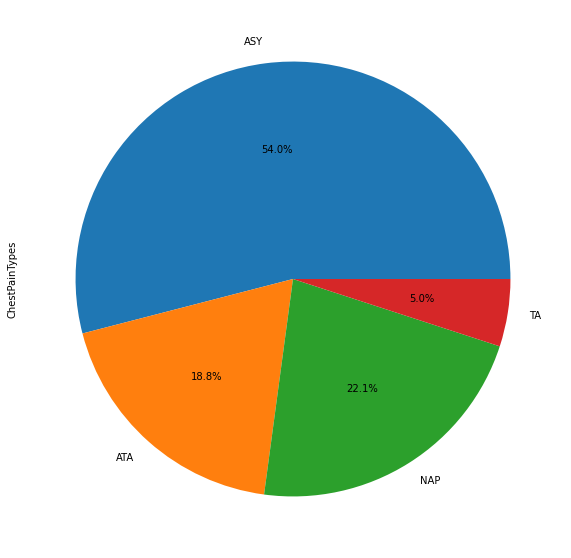

In [9]:
data.groupby('ChestPainType').size().plot(kind = 'pie', ylabel = 'ChestPainTypes', autopct='%1.1f%%', figsize=(15,10))

In [10]:
numerical = data.columns
numerical

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
int64 = data.select_dtypes(['int64']).columns
float64 = data.select_dtypes(['float64']).columns
obj = data.select_dtypes(['object']).columns

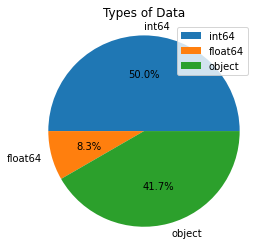

In [12]:
labels = ['int64', 'float64', 'object']
plt.pie([len(int64), len(float64), len(obj)], labels = labels, autopct = '%1.1f%%', radius = 1.1)
plt.title('Types of Data')
plt.legend()
plt.show()

In [13]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


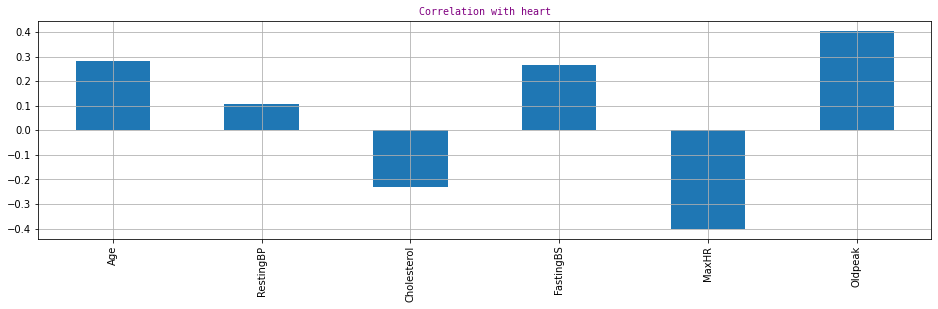

In [14]:
#Correlation with Response Variable class
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

X.corrwith(y).plot.bar(figsize=(16, 4), rot=90, grid=True)
plt.title('Correlation with heart',
          fontsize=25,
          color='Purple',
          font='monospace')
plt.show()

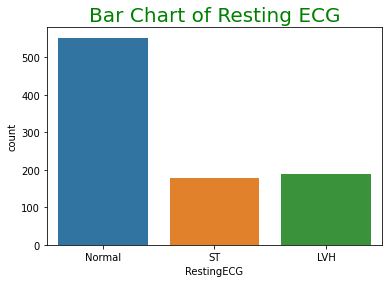

In [15]:
sb.countplot(data=data, x = 'RestingECG')
plt.title('Bar Chart of Resting ECG', color = 'green', fontsize = 20)
plt.show()

In [16]:
data.groupby('ExerciseAngina').size()

ExerciseAngina
N    547
Y    371
dtype: int64

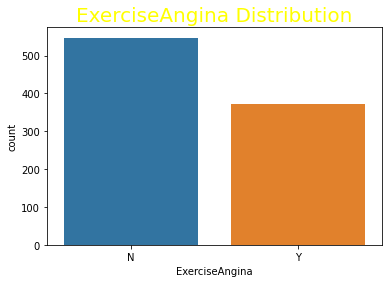

In [17]:
sb.countplot(data=data, x = 'ExerciseAngina')
plt.title('ExerciseAngina Distribution', color = 'yellow', fontsize = 20)
plt.show()

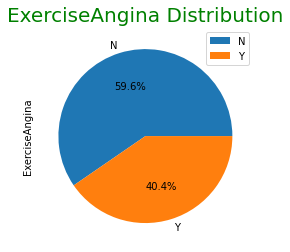

In [18]:
data.groupby('ExerciseAngina').size().plot(kind = 'pie', autopct = '%1.1f%%', ylabel = 'ExerciseAngina')
plt.title('ExerciseAngina Distribution', color = 'g', size = 20)
plt.legend()
plt.show()

In [19]:
data.groupby('ST_Slope').size()

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64

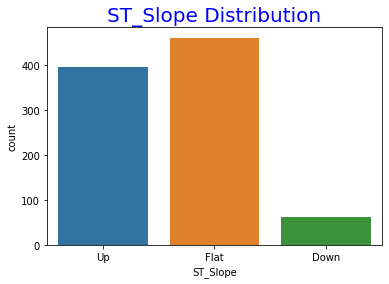

In [20]:
sb.countplot(data = data, x = 'ST_Slope')
plt.title('ST_Slope Distribution', size = 20, color = 'b')
plt.show()

In [21]:
data = pd.get_dummies(data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

## Standardizing the data using StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

# MODEL IMPLEMENTATION

In [24]:
from sklearn.svm import SVC
svc = SVC(C = 100)
svc.fit(X_train, y_train)
svm_y_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(f'Support Vector Machines accuracy: {accuracy_score(y_test, svm_y_pred, normalize = True)}')

Support Vector Machines accuracy: 0.8260869565217391


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
print(f'K Nearest Neighbors accuracy: {accuracy_score(y_test, knn_y_pred, normalize = True)}')

K Nearest Neighbors accuracy: 0.8659420289855072


In [37]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state = 42)
classifier_rf.fit(X_train, y_train)
rdfor_y_pred = classifier_rf.predict(X_test)
print(f'Random Forest Classifier Accuracy: {accuracy_score(y_test, rdfor_y_pred, normalize = True)}')
print(f'Classification Report: \n {classification_report(y_test, rdfor_y_pred)}')

Random Forest Classifier Accuracy: 0.8768115942028986
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       112
           1       0.90      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



In [42]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
NB_y_pred = gaussian.predict(X_test)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_score(y_test, NB_y_pred, normalize = True)}')
print(f'Classification Report: \n {classification_report(y_test, NB_y_pred)}')

Gaussian Naive Bayes Accuracy: 0.8768115942028986
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

